In [192]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import plotly
from pathlib import Path
from dotenv import load_dotenv

In [193]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [194]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [195]:
# Import the CSVs to Pandas DataFrames
file_path = Path("../Py Viz/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("../Py Viz/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

In [196]:
# Getting the data from the top 10 expensive neighbourhoods
neighbourhoods = to_data.groupby('neighbourhood').sum()
neighbourhoods = neighbourhoods / 4
top_10_expensivest = neighbourhoods.nlargest(10, 'average_house_value')
top_10_expensivest_avg_house_value = top_10_expensivest[['average_house_value']]
top_10_expensivest_avg_house_value

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [197]:
# Calculate the mean number of dwelling types units per year
neighbourhoods

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


In [198]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs = to_data.groupby('year').sum()
shelter_costs = shelter_costs[['shelter_costs_owned', 'shelter_costs_rented']]
#There are a 140 neighborhoods
shelter_costs = shelter_costs / 140
shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [199]:
# Define Panel visualization functions
#Neighbourhood Map
df_neighbourhood_locations = df_neighbourhood_locations.set_index('neighbourhood')
neighbourhoods_map = pd.concat([df_neighbourhood_locations, neighbourhoods], axis = 'columns', join = 'inner')

In [200]:
neighbourhoods_map_no_index = neighbourhoods_map.reset_index()

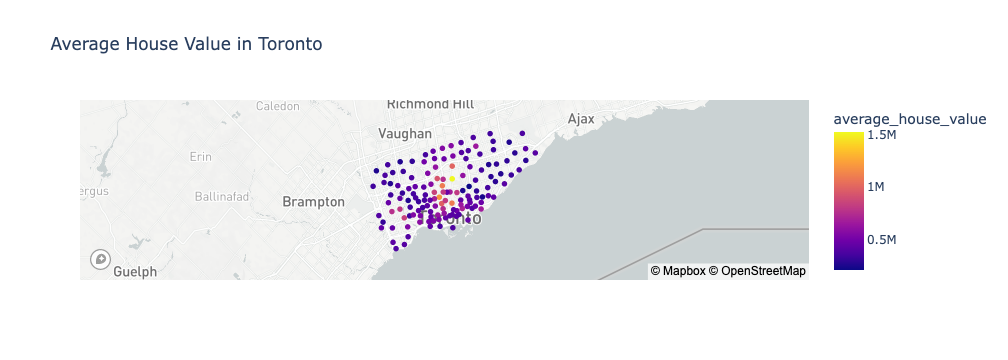

In [240]:
map_1 = px.scatter_mapbox(
    neighbourhoods_map_no_index,
    title = 'Average House Value in Toronto',
    lat="lat",
    lon="lon",
    color = "average_house_value",
)
map_1.show()

In [234]:
# defining dwelling types per year

# Helper create_bar_chart function

def create_bar_2001():
    bar_plot = df_2001.hvplot.bar(xlabel='2001',ylabel='Dwelling Types in Toronto in 2001',title='Dwelling Types in Toronto in 2001', width=650, height=500, color='red',rot=90).opts(yformatter='%.0f2')
    return bar_plot

def create_bar_2006():
    bar_plot = df_2006.hvplot.bar(xlabel='2006',ylabel='Dwelling Types in Toronto in 2006',title='Dwelling Types in Toronto in 2006', width=650, height=500, color='black',rot=90).opts(yformatter='%.0f2')
    return bar_plot
def create_bar_2011():
    bar_plot = df_2011.hvplot.bar(xlabel='2011',ylabel='Dwelling Types in Toronto in 2011',title='Dwelling Types in Toronto in 2011', width=650, height=500, color='yellow',rot=90).opts(yformatter='%.0f2')
    return bar_plot

def create_bar_2016():
    bar_plot = df_2016.hvplot.bar(xlabel='2016',ylabel='Dwelling Types in Toronto in 2016',title='Dwelling Types in Toronto in 2016', width=650, height=500, color='purple',rot=90).opts(yformatter='%.0f2')
    return bar_plot



dwelling_types_per_year = to_data.groupby('year').sum()
dwelling_types_per_year = dwelling_types_per_year[['single_detached_house' , 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]

In [228]:
df_2001 = pd.DataFrame(dwelling_types_per_year.iloc[0,:])
df_2001.rename(columns= {2001: "dwelling"}, inplace= True)                        

In [230]:
df_2006 = pd.DataFrame(dwelling_types_per_year.iloc[1,:])
df_2006.rename(columns= {2006: "dwelling"}, inplace= True)   

In [231]:
df_2011 = pd.DataFrame(dwelling_types_per_year.iloc[2,:])
df_2011.rename(columns= {2011: "dwelling"}, inplace= True)                        

In [232]:
df_2016 = pd.DataFrame(dwelling_types_per_year.iloc[3,:])
df_2016.rename(columns= {2016: "dwelling"}, inplace= True)

In [246]:
first2_bar_charts= pn.Column(create_bar_2001, create_bar_2006)
last2_bar_charts = pn.Column(create_bar_2011, create_bar_2016)
all_bar_charts = first2_bar_charts + last2_bar_charts

In [257]:
# Defining the average monthly shelter costs for owned and rented dwellings
# Helper create_line_chart function
shelter_avg_costs = to_data[['shelter_costs_owned', 'shelter_costs_rented']].groupby(to_data.index).mean()

shelter_avg_costs

#shelter_costs_owned = pd.DataFrame(shelter_costs.iloc[:,0])
#average_monthly_owned = line_chart(shelter_costs_owned, 'Average Monthly Shelter Cost for Owned Dwellings in Toronto', 'Year', 'Avg Monthly Shelter Cost', 'gold')

def owned():
    line_plot = shelter_costs_owned.hvplot.line(xlabel="Year", ylabel="Avg Monthly Shelter Costs", title='Average Monthly Shelter Costs for owned Dwellling in Toronto',color="blue")
    return line_plot

def rented():
    line_plot = shelter_costs_rented.hvplot.line(xlabel="Year", ylabel="Avg Monthly Shelter Costs", title='Average Monthly Shelter Costs for rented Dwelling in Toronto',color="black")
    return line_plot

def average_hv():
    line_plot = average_house_value_per_year.hvplot.line(xlabel="Year", ylabel="Avg House Value", title='Average House Value in Toronto',color="red")
    return line_plot

In [265]:
all_line_charts = pn.Column(owned, rented)

In [253]:
shelter_costs_owned = pd.DataFrame(shelter_costs.iloc[:,0])

In [256]:
shelter_costs_rented = pd.DataFrame(shelter_costs.iloc[:,1])

In [259]:
average_house_value_per_year = to_data.groupby('year').sum()
average_house_value_per_year = average_house_value_per_year[['average_house_value']]
average_house_value_per_year = average_house_value_per_year/140

In [212]:
# defining the mean house values by neighbourhood per year
average_house_value = to_data[['neighbourhood', 'average_house_value']]
linechart_for_average_house_value = average_house_value.hvplot(groupby = 'neighbourhood', xlabel = 'Year', ylabel= 'Average House Value').opts(yformatter= '%.0f')

In [213]:
#Defining all dwelling types per year
number_of_dwelling_types_per_year =  to_data[['neighbourhood', 'single_detached_house' , 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]
barchart_number_of_dwelling_types_per_year = number_of_dwelling_types_per_year.hvplot.bar(groupby = 'neighbourhood', rot = 90, width= 650, height= 500, xlabel= "Year", ylabel = "Dwelling Type Units")

In [214]:
# Defining the top 10 expensive neighbourhoods
top_10 = top_10_expensivest_avg_house_value.hvplot.bar(rot = 90, width= 500, height= 500, title = 'Top 10 Expensivest Neighbourhoods in Toronto', xlabel= "Neighbourhoods", ylabel = "Avg House Value").opts(yformatter= '%.0f')

In [263]:
#Line Chart and Map Analysis of Average House Value
avg_hv = pn.Column(average_hv, map_1)

In [215]:
#Panel Dashboard

In [217]:
load_dotenv()
map_box_api = os.getenv("MAP_BOX_KEY")
print(map_box_api)
px.set_mapbox_access_token(map_box_api)

pk.eyJ1IjoiZmVybjExMjMiLCJhIjoiY2wxYmNhZDl0MmVvcjNldjAzcTBqNDNnMyJ9.R37GH0MmgML-edU_T4sDaQ


In [264]:
tabs = pn.Tabs(
    ("Analysis of All Neighborhoods", linechart_for_average_house_value),
    ("Yearly Market Analysis", all_bar_charts),
    ("Average Monthly Shelter Costs", all_line_charts),
    ("Line Chart and Map Analysis of Average House Value", avg_hv),
    ("Number of Dwelling Types per Year", barchart_number_of_dwelling_types_per_year),
    ("Richest Neighbourhoods", top_10)
)
tabs

Tabs
    [0] Row(name='Analysis of A...)
        [0] HoloViews(DynamicMap, name='Analysis of A...)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
            [1] VSpacer()
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive24673')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive24799')
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive24926')
        [3] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive25052')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive26964')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive27046')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive28595')
        [1] Plotly(Figure)
    [4] Row(name='Number of Dwelling T...)
        [0] HoloViews(DynamicMap, name='Number of Dwelling T...)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
            [1] VSpacer()
    [5] HoloViews(Bars, name='Richest Neighbourhoods')